In [16]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from utilities import deets
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from utilities import make_model
class feat_test_mdoel(make_model):
    def __init__(self , name , clf , gamma ,x ,y , train_data_loc):
        self.features = x.columns.to_list() 
        self.train_data_loc = train_data_loc
        make_model.__init__(self , name , clf , gamma , x ,y)

In [11]:
df = (
    pd.read_csv('../../not_on_git/final_classification/all_classified.csv')
    .set_index('name')
    .query('prob>.997')
    )
df

,significance,var_flag,streak_src_flag,pileup_flag,ra,dec,missing,sat_src_flag,extent_flag,conf_flag,...,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2,0p3_8_csc,24_microns_(MIPS)
name,,,,,,,,,,,,,,,,,,,,,
2CXO J010256.7-724811,3.473684,0,0,0,15.736332,-72.803305,0.305085,0,0,0,...,3.162366,2.666958,3.142501,8.446456,2.773556,3.397729,4.124210,5.156864,NaN,NaN
2CXO J010853.2-731439,2.307692,0,0,0,17.221964,-73.244442,0.355932,0,0,0,...,3.477093,NaN,3.400918,NaN,3.280334,3.522581,NaN,NaN,NaN,NaN
2CXO J010935.1-714415,4.000000,0,0,0,17.396491,-71.737602,0.338983,0,0,0,...,NaN,4.205817,NaN,8.809085,NaN,NaN,NaN,6.812482,NaN,NaN
2CXO J011655.5-734034,2.166667,0,0,0,19.231259,-73.676364,0.288136,0,0,0,...,3.188112,2.666612,3.150756,8.262702,3.222395,3.526692,3.800834,5.823164,NaN,NaN
2CXO J012125.0-725827,10.584334,0,0,0,20.354232,-72.974249,0.389831,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.250784,3.518963,5.990373,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J094741.9+073307,13.728778,1,0,0,146.924694,7.551989,0.237288,0,0,0,...,NaN,3.889395,NaN,4.866196,NaN,NaN,NaN,6.208020,0.027493,NaN
2CXO J094748.1+073423,3.526316,1,0,0,146.950681,7.573088,0.305085,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.976942,0.006911,NaN
2CXO J060212.5-395227,3.736842,1,0,0,90.552354,-39.874428,0.474576,0,0,0,...,NaN,NaN,NaN,NaN,NaN,3.506049,NaN,NaN,NaN,NaN


In [12]:
print(df['class'].value_counts().to_markdown())

|        |   class |
|:-------|--------:|
| AGN    |   32600 |
| STAR   |   16148 |
| YSO    |    5184 |
| HMXB   |     439 |
| LMXB   |     197 |
| CV     |      89 |
| PULSAR |      63 |
| ULX    |      50 |


In [13]:
from utilities import plot_feat_feat , get_true_data

In [14]:
true_df = get_true_data(df[['prob' , 'class']])
filters = ['b' , 'm' , 's' , 'h' , 'u']
# for f in filters:
#     true_df = true_df[true_df[f'{f}-csc']>0]
for f in filters:
    true_df[f'{f}-mag'] = [np.nan]*len(true_df)
    true_df.loc[true_df[f'{f}-csc']>0 , f'{f}-mag'] = -np.log10(true_df.loc[true_df[f'{f}-csc']>0][f'{f}-csc'])
true_df['h-m'] = true_df['h-mag'] - true_df['m-mag']
true_df['h-s'] = true_df['h-mag'] - true_df['s-mag']
true_df['m-s'] = true_df['m-mag'] - true_df['s-mag']

true_df['hard_hm'] = np.nan
true_df['hard_ms'] = np.nan
true_df['hard_hs'] = np.nan

true_df['hard_hm'] = (true_df['h-csc'] - true_df['m-csc']) / (true_df['h-csc'] + true_df['m-csc'])
true_df['hard_ms'] = (true_df['m-csc'] - true_df['s-csc']) / (true_df['m-csc'] + true_df['s-csc'])
true_df['hard_hs'] = (true_df['h-csc'] - true_df['s-csc']) / (true_df['h-csc'] + true_df['s-csc'])

for i in range(len(true_df)):
    for hd in (['hard_hm' , 'hard_ms' , 'hard_hs']):
        h = true_df[hd][i]
        if(h>0.99):
            true_df[hd][i]=np.nan
        if(h<-0.99):
            true_df[hd][i]=np.nan
true_df['fx/fo'] = true_df['b-mag'] - true_df['gmag']

/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/kumaran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


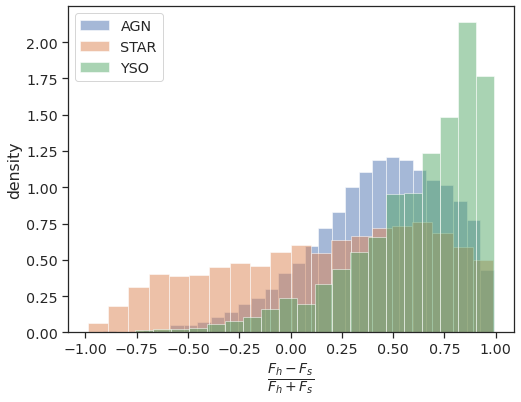

In [18]:
from utilities import set_plot
set_plot(font_size=1.3)
plt.figure(figsize=(8,6))
plt.hist(true_df[true_df['class']=='AGN']['hard_hs'] , label = 'AGN' , bins=30 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='STAR']['hard_hs'] , label='STAR' , bins=20 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='YSO']['hard_hs'] , label='YSO' , bins=20 , density=True , alpha=0.5)
# plt.hist(true_df[true_df['class']=='HMXB']['hard_ms'] , label='YSO' , bins=20 , density=True , alpha=0.5)
plt.ylabel('density')
plt.xlabel(r'$\frac{F_h-F_s}{F_h+F_s}$' , size=20)
plt.savefig('result/plots/feature_sep/hard_hs.jpg')
plt.legend()
plt.show()

In [87]:
def plot_hist(ax , feat , classes, bins):
    for cl , bin in zip(classes , bins):
        ax.hist(true_df[true_df['class']==cl][feat] , label = cl , bins=bin , density=True , alpha=0.5)
    # ax.legend()
    # ax.set_ylabel('density')
    return ax

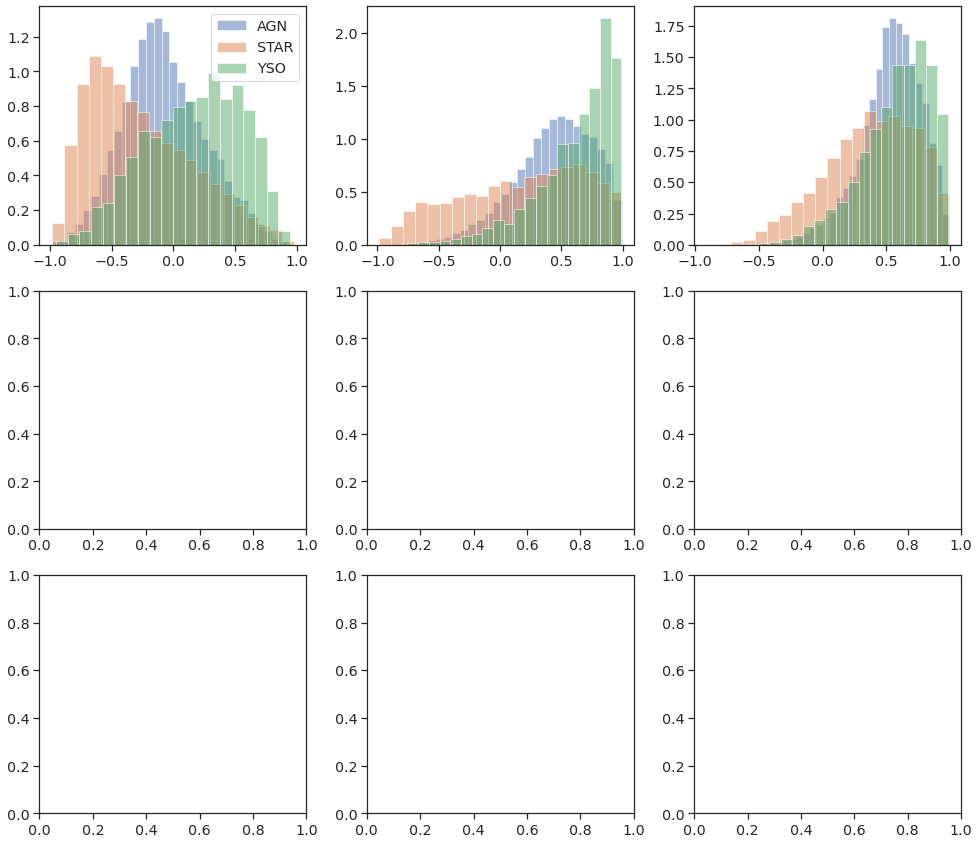

In [88]:
from utilities import set_plot
set_plot(font_size=1.3)
fig , ax = plt.subplots(nrows = 3, ncols=3, figsize = (14,12))
ax = np.ravel(ax)
plot_hist(ax[0] , 'hard_ms' , classes=['AGN','STAR','YSO'], bins = [30,20,20])
plot_hist(ax[1] , 'hard_hs' , classes=['AGN','STAR','YSO'], bins = [30,20,20])
plot_hist(ax[2] , 'hard_hm' , classes=['AGN','STAR','YSO'], bins = [30,20,20])

ax[0].legend()
plt.tight_layout()
plt.show()

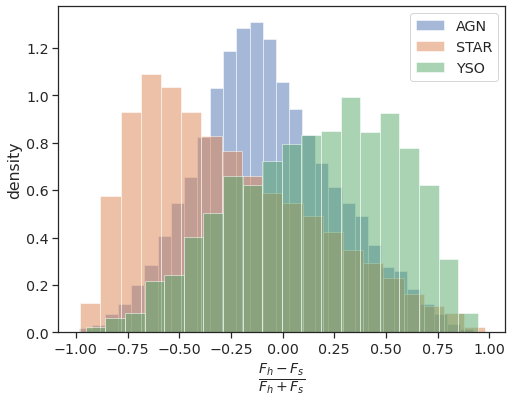

In [19]:
from utilities import set_plot
set_plot(font_size=1.3)
fig , ax = plt.subplots(nrows = 3, ncols=3, figsize = (14,12))
ax = np.ravel(ax)
plot_hist(ax[0] , 'hard_ms' , classes=['AGN','STAR','YSO'], bins = [30,20,20])
plt.hist(true_df[true_df['class']=='AGN']['hard_ms'] , label = 'AGN' , bins=30 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='STAR']['hard_ms'] , label='STAR' , bins=20 , density=True , alpha=0.5)
plt.hist(true_df[true_df['class']=='YSO']['hard_ms'] , label='YSO' , bins=20 , density=True , alpha=0.5)
# plt.hist(true_df[true_df['class']=='HMXB']['hard_ms'] , label='YSO' , bins=20 , density=True , alpha=0.5)
plt.ylabel('density')
plt.xlabel(r'$\frac{F_h-F_s}{F_h+F_s}$' , size=20)
plt.savefig('result/plots/feature_sep/hard_ms.jpg')
plt.legend()
plt.show()

## KS-TEST

In [20]:
true_df[true_df['class']=='AGN']['hard_ms']

name
2CXO J010935.1-714415   -0.091813
2CXO J143009.6+311418   -0.202756
2CXO J143022.6+311158   -0.081822
2CXO J143038.3+311055   -0.270221
2CXO J143521.3+305719    0.029524
                           ...   
2CXO J221843.5-272751   -0.465783
2CXO J094732.5+071827   -0.063660
2CXO J094734.3+072440   -0.140998
2CXO J094741.9+073307   -0.003242
2CXO J094748.1+073423   -0.330704
Name: hard_ms, Length: 32600, dtype: float64

In [61]:
from scipy import stats
from tqdm import tqdm 

def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf
    
def ks_2samp(sample1, sample2):
    # Gets all observations
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    # Sorts the samples
    sample1.sort()
    sample2.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    obs = np.linspace(np.nanmin(observations), np.nanmax(observations) , 200)
    cdf_1, cdf_2 = [],[]
    for x in tqdm(obs):
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        cdf_1.append(cdf_sample1)
        cdf_2.append(cdf_sample2)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    return {"ks_stat": ks_stat, "p_value" : p_value} , cdf_1 , cdf_2, obs

In [68]:
set_agn = true_df[true_df['class']=='AGN']['hard_ms'].to_list()
set_yso = true_df[true_df['class']=='YSO']['hard_ms'].to_list()
set_star = true_df[true_df['class']=='STAR']['hard_ms'].to_list()

agn_yso , cdf_1 , cdf_2, obs = ks_2samp(set_agn, set_yso)

100%|██████████| 200/200 [00:18<00:00, 10.68it/s]


In [63]:
print(agn_yso)

{'ks_stat': 0.42860808149662954, 'p_value': 0.0}


/home/kumaran/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


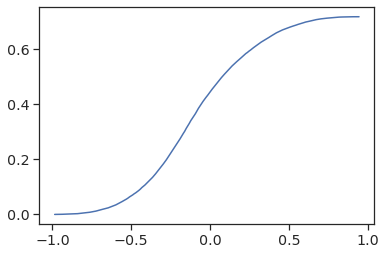

In [67]:
sns.lineplot(obs, cdf_1)
# plt.plot(obs, cdf_2)
plt.show()

In [40]:
agn_yso

{'ks_stat': 0.0, 'p_value': 1.0}

In [59]:

set_c = true_df[true_df['class']=='STAR']['hard_ms'].to_list()
sets = [set_a, set_b, set_c,]
names = ['norm_a', 'norm_b', 'norm_c',]
ks_scores = {}
for _ in range(len(names)):
    name1 = names.pop(0)
    sample1 = sets.pop(0)
    for name2, sample2 in zip(names, sets):
        key1 = name1 + "_" +  name2
        key2 = name2 + "_" +  name1
        ks = ks_2samp(sample1, sample2)
        ks_scores[key1] = ks
        ks_scores[key2] = ks
# Prints the results
print(f"norm_a vs norm_b: ks = {ks_scores['norm_a_norm_b']['ks_stat']:.4f} (p-value = {ks_scores['norm_a_norm_b']['p_value']:.3e}, are equal = {ks_scores['norm_a_norm_b']['p_value'] > 0.05})")
print(f"norm_a vs norm_c: ks = {ks_scores['norm_a_norm_c']['ks_stat']:.4f} (p-value = {ks_scores['norm_a_norm_c']['p_value']:.3e}, are equal = {ks_scores['norm_a_norm_c']['p_value'] > 0.05})")
# print(f"norm_a vs f_a: ks = {ks_scores['norm_a_f_a']['ks_stat']:.4f} (p-value = {ks_scores['norm_a_f_a']['p_value']:.3e}, are equal = {ks_scores['norm_a_f_a']['p_value'] > 0.05})")
print(f"norm_b vs norm_c: ks = {ks_scores['norm_b_norm_c']['ks_stat']:.4f} (p-value = {ks_scores['norm_b_norm_c']['p_value']:.3e}, are equal = {ks_scores['norm_b_norm_c']['p_value'] > 0.05})")
# print(f"norm_b vs f_a: ks = {ks_scores['norm_b_f_a']['ks_stat']:.4f} (p-value = {ks_scores['norm_b_f_a']['p_value']:.3e}, are equal = {ks_scores['norm_b_f_a']['p_value'] > 0.05})")
# print(f"norm_c vs f_a: ks = {ks_scores['norm_c_f_a']['ks_stat']:.4f} (p-value = {ks_scores['norm_c_f_a']['p_value']:.3e}, are equal = {ks_scores['norm_c_f_a']['p_value'] > 0.05})")


100%|██████████| 100/100 [00:04<00:00, 21.65it/s]


TypeError: tuple indices must be integers or slices, not str

In [27]:
from scipy import stats

In [69]:
print(stats.ks_2samp(set_agn, set_yso))
print(stats.ks_2samp(set_agn, set_star))
print(stats.ks_2samp(set_yso, set_star))

KstestResult(statistic=0.4289230667272589, pvalue=0.0)
KstestResult(statistic=0.21528845905436064, pvalue=0.0)
KstestResult(statistic=0.44498076434951994, pvalue=0.0)


In [31]:
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

In [ ]:
cdf()